# Model Evaluation on Employee Attrition data - Murthy - GCD - Term 2

## Table of Contents
1. [Problem Statement](#section1)<br>
2. [Importing Packages](#section2)<br>
3. [Loading Data](#section3)<br>
  - 3.1 [Description of the Datasets](#section301)<br>
4. [Exploratory Data Analysis (EDA)](#section4)<br>
5. [Data Preparation for Model Training](#section5)<br>
  - 5.1 [Preparing X and y using pandas](#section501)<br>
  - 5.2 [Splitting X and y into training and test datasets](#section502)<br>
6. [Logistic Regression](#section6)<br>
  - 6.1 [ Using model for prediction](#section601)<br>
  - 6.2 [Model Evaluation for LR using accuracy classification score](#section602)<br>
7. [Decision Tree](#section7)<br>
  - 7.1 [ Model evaluation for Decision Tree](#section701)<br>
  - 7.2 [Hyperparameter Optimization with Gridsearch](#section702)<br>
8. [Random Forest](#section8)<br>
  - 8.1 [Using the Model for Prediction](#section801)<br>
  - 8.2 [Model evaluation for Decision Tree](#section802)<br>
  - 8.3 [Hyper parameter for RF tuning using RANDOM SEARCH](#section803)<br>
9. [Model Evaluation -  Comparing Models](#section9)<br>
  - 9.1 [Model evaluation using accuracy score](#section901)<br>
  - 9.2 [Model evaluation using confusion matrix](#section902)<br>
  - 9.3 [Model evaluation using precision score](#section903)<br>
  - 9.4 [Model evaluation using recall score](#section904)<br>
  - 9.5 [Summary](#section905)<br>

<a id=section1></a> 
## 1. Problem Statement

The key to success in an organization is the ability to attract and retain top talents. It is vital for the Human Resource (HR) Department to identify the factors that keep employees and those which prompt them to leave. Companies could do more to prevent the loss of good people.

This project is based on a hypothetical dataset downloaded from IBM HR Analytics Employee Attrition & Performance.
This dataset describes each employee's background and characteristics.Machine Learning models can help to understand and determine how these factors relate to workforce attrition

<a id=section2></a>
## 2. Importing Packages


In [1]:
import numpy as np                                                 # Implemennts milti-dimensional array and matrices
import pandas as pd                                                # For data manipulation and analysis
#import pandas_profiling
import matplotlib.pyplot as plt                                    # Plotting library for Python programming language and it's numerical mathematics extension NumPy
import seaborn as sns                                              # Provides a high level interface for drawing attractive and informative statistical graphics
%matplotlib inline
sns.set()


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
import warnings
warnings.filterwarnings('ignore')


pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 200)
#pd.reset_option('^display.', silent=True)

<a id=section3></a>
## 3. Loading Data

#### Importing the Dataset

In [3]:
data = pd.read_csv('datasets_1067_1925_WA_Fn-UseC_-HR-Employee-Attrition.csv') 

In [4]:
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [5]:
data.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

<a id=section301></a>
### 3.1 Description of the Dataset

| Column Name        | Description                                                           |
| -------------      |:-------------                                                         | 
| Age			     | Age of the Employee                                                   | 
| Attrition          | Attrition (This is target variable)                                   |  
| BusinessTravel     | Frequency of business travel                                          | 
| DailyRate          | Daily rate of teh employee                                            |   
| Department         | Department of the employee                                            |
| DistanceFromHome   | Distance of employee home from office                                 |
| Education          | Employee education  								                     |
| EducationField     | Education field							                             |
| EmployeeCount      | Employee count                                                        |
| EmployeeNumber     | Employee Number                                                       |
| EnvironmentSatisfaction     | Overall satisfication of the work environment                |
| Gender     					| Gender of the employee                |
| HourlyRate     | Hourly rate of the employee                |
| JobInvolvement     | Involvement level of the employee in current job role                |
| JobRole     | Job role of the employee              |
| JobSatisfaction     | Job satisfication level of the employee              |
| MaritalStatus     | Marital Status              |
| MonthlyIncome     | Monthly income of employee           |
| NumCompaniesWorked     | Number of companies worked           |
| Over18     | is Employee over 18 years above?           |
| OverTime     | is Employee allowed to do Over time?           |
| PercentSalaryHike     | Salary hike provided           |
| PerformanceRating     | Performance rating of the employee           |
| StandardHours     | Standard working hours           |
| StockOptionLevel     | is Stock options provided?         |
| TotalWorkingYears     | Total years of experience         |
| TrainingTimesLastYear     | Last year attended traing time         |
| WorkLifeBalance     | Work Life Balance level       |
| YearsAtCompany     | Number of years experience at current employer       |
| YearsInCurrentRole     | Years in current role       |
| YearsSinceLastPromotion     | Years since last promotion       |
| YearsWithCurrManager     | Number of years since working with current manager      |


<a id=section4></a>
## 4. Exploratory Data Analysis (EDA)

In [6]:
data.info()
# 1470 entries and 35 columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [7]:
# Any missing values?
print('\nMissing values:  ', data.isnull().sum().values.sum())
data.isnull().sum()


Missing values:   0


Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [8]:
# Dropping unwanted columns
data.drop(["EmployeeCount","EmployeeNumber","Over18","StandardHours"],axis=1,inplace=True)

In [9]:
# proportion of Attrition
data['Attrition'].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

Text(0.5, 1.0, 'Attrition')

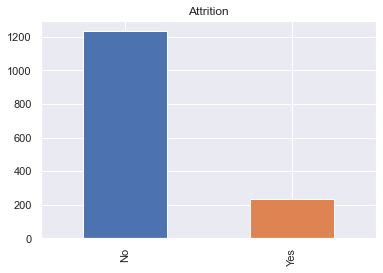

In [10]:
# Class is imbalance as Attrition entries are less compared to non-Attrition.
data['Attrition'].value_counts().plot(kind='bar', color=('C0','C1')).set_title('Attrition')

#### HourlyRate Vs Attrition

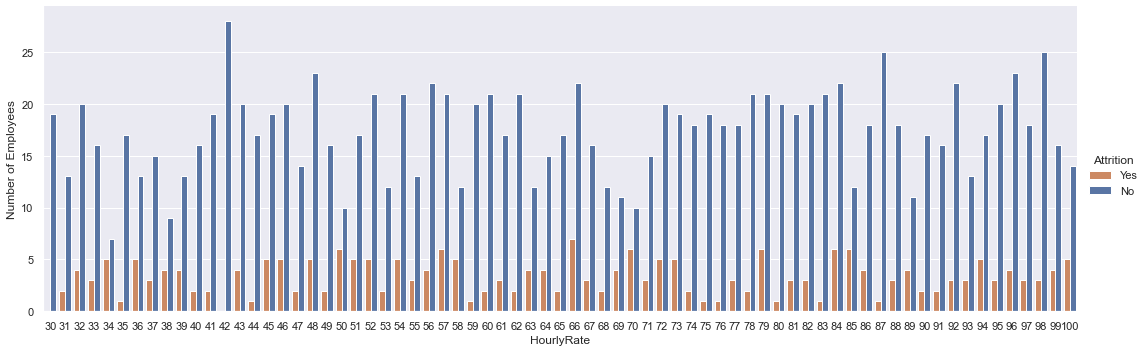

In [11]:
## Employee distribution by HourlyRate, with distinct Attrition classes
sns.axes_style('whitegrid')
sns.catplot('HourlyRate', data=data, aspect=3, kind='count', hue='Attrition', palette=['C1', 'C0']).set_ylabels('Number of Employees')

In [12]:
# Mean and Std of Hourly rate
print("Mean of Hourly rate :", data['HourlyRate'].mean())
print("Standard deviation of Hourly rate :", np.std(data['HourlyRate']) )


Mean of Hourly rate : 65.89115646258503
Standard deviation of Hourly rate : 20.322511646324006


In [13]:
# mean & stdev of hourly rate for those Attrition=='No'
print("Mean of Hourly rate for those Attrition=='No' :", data[data.Attrition == 'No']['HourlyRate'].mean())
print("Standard deviation of Hourly rate for those Attrition=='No' :", np.std(data[data.Attrition == 'No']['HourlyRate']) )

Mean of Hourly rate for those Attrition=='No' : 65.9521492295215
Standard deviation of Hourly rate for those Attrition=='No' : 20.37248786486743


In [14]:
# mean & stdev of hourly rate for those Attrition=='Yes'
print("Mean of Hourly rate for those Attrition=='Yes' :", data[data.Attrition == 'Yes']['HourlyRate'].mean())
print("Standard deviation of Hourly rate for those Attrition=='Yes' :", np.std(data[data.Attrition == 'Yes']['HourlyRate']) )

Mean of Hourly rate for those Attrition=='Yes' : 65.57383966244726
Standard deviation of Hourly rate for those Attrition=='Yes' : 20.057507807158082


Hourly rate seems to have little/no effect on Attrition as mean and standard deviation are almost same for both the (attrition and non-attrition) the classes.

#### Overtime Vs Attrition

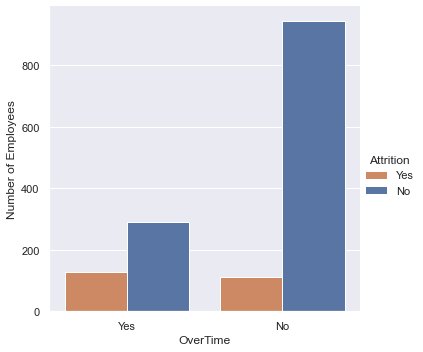

In [15]:
#eEployee distribution plot by OverTime, with distinct Attrition classes
sns.catplot("OverTime", data=data, aspect=1, kind='count', hue='Attrition', palette=['C1', 'C0']).set_ylabels('Number of Employees')

Overtime seems to be key factor for Attrition

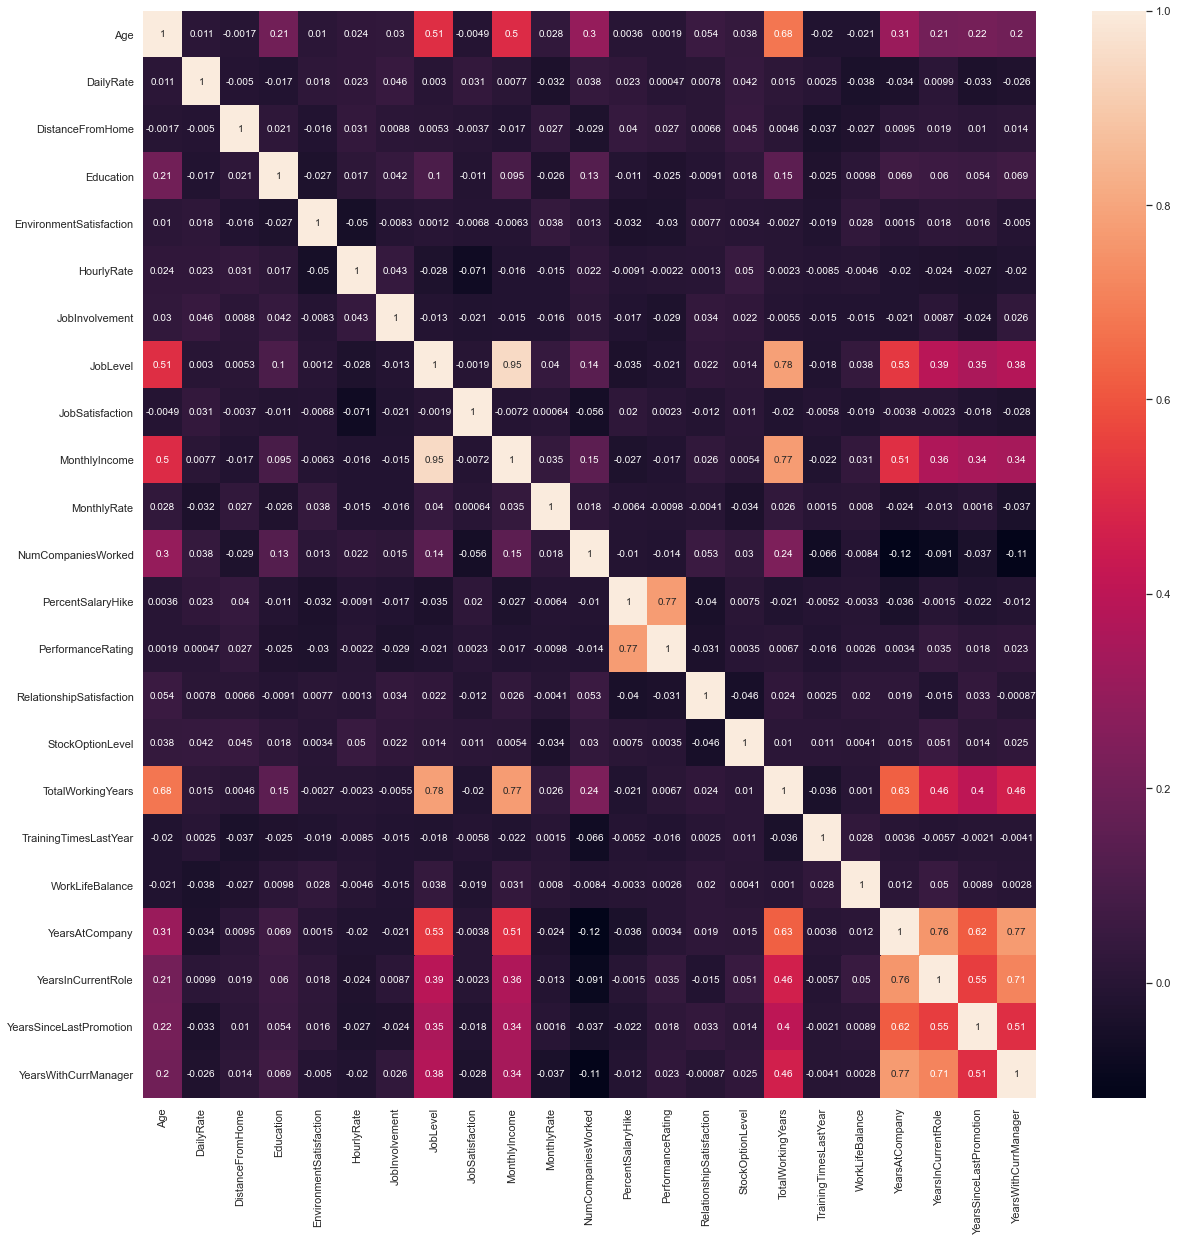

In [16]:
f, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(data.corr(), annot=True)

- Job level is strongly correlated with Monthly income and Total working years
- Monthly income is strongly correlated with Total working years


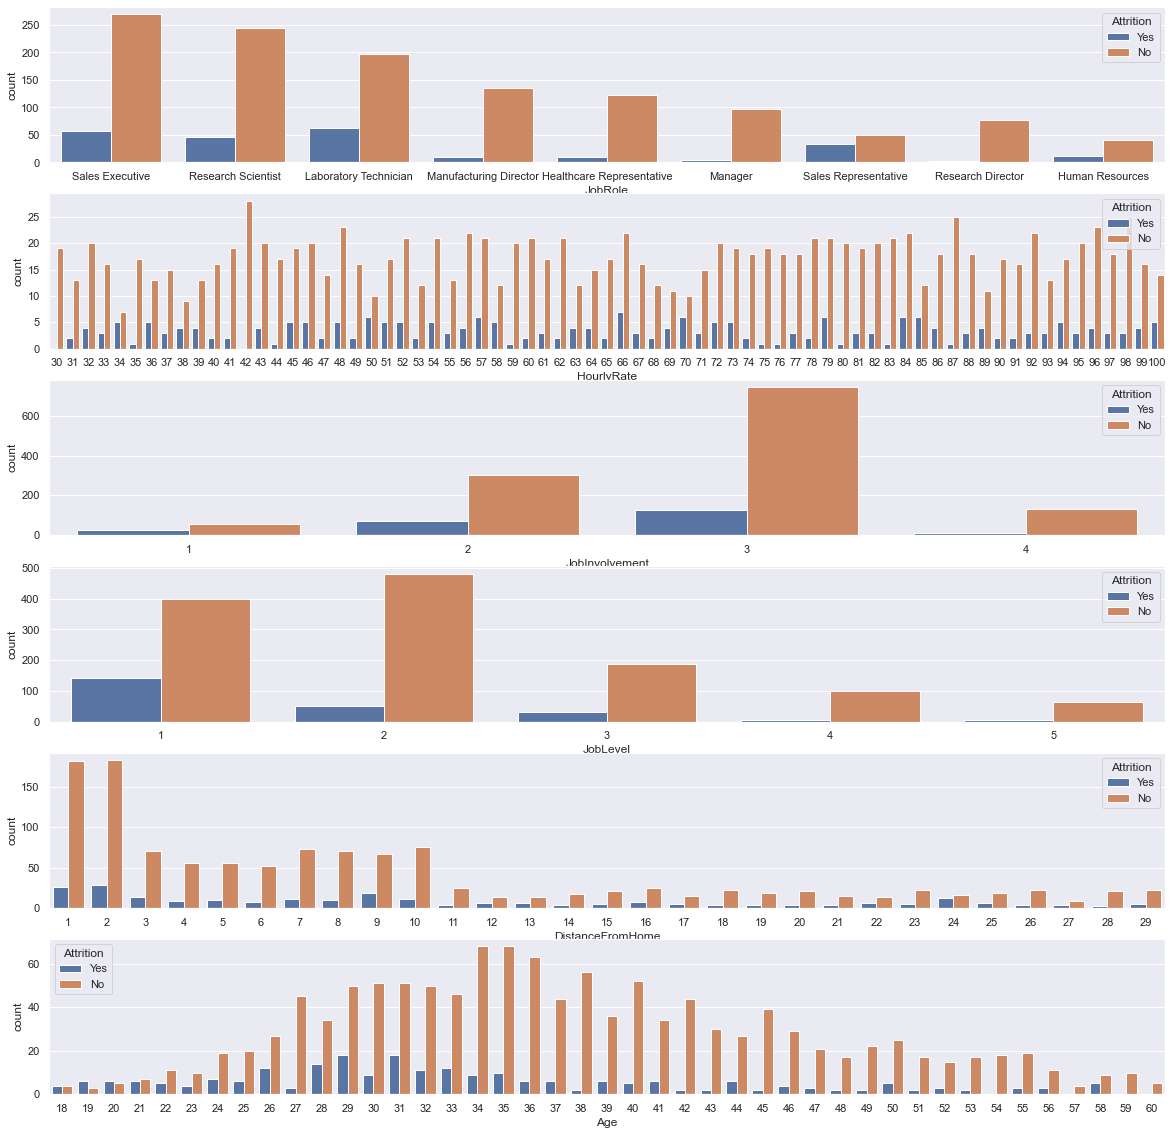

In [17]:
# Plots
plt.figure(figsize=[20,20])
plt.subplot(611)
sns.countplot(x='JobRole',hue='Attrition',data=data)
plt.subplot(612)
sns.countplot(x='HourlyRate',hue='Attrition',data=data)
plt.subplot(613)
sns.countplot(x='JobInvolvement',hue='Attrition',data=data)
plt.subplot(614)
sns.countplot(x='JobLevel',hue='Attrition',data=data)
plt.subplot(615)
sns.countplot(x='DistanceFromHome',hue='Attrition',data=data)
plt.subplot(616)
sns.countplot(x='Age',hue='Attrition',data=data)


- Half of sale representative staff tend to leave followed by lab technicians and research scientist
- The employees with JobInvolvemnet score 3 tend to quit
- Most of the staff in JobLevel 1 are likely to leave
- Employees between the age 26 to 33 have high tendency to leave

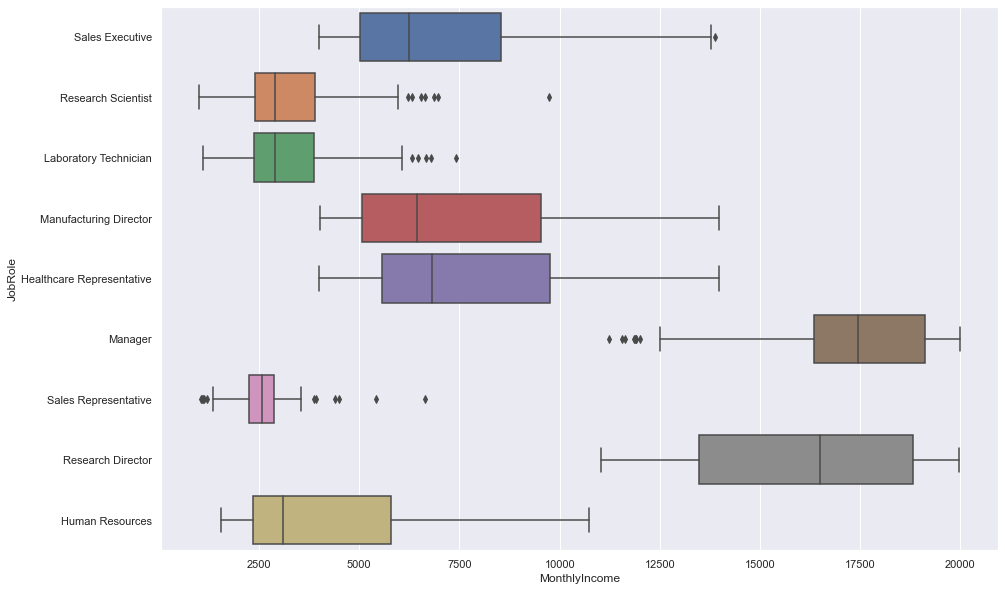

In [18]:
# Median salary of each job role
plt.figure(figsize=(15,10))
sns.boxplot(x=data.MonthlyIncome,y=data.JobRole)

- Managers and Research directors are highly paid
- Sales Representative, Laboratory Technician and Research Scientist get paid pretty much the same.

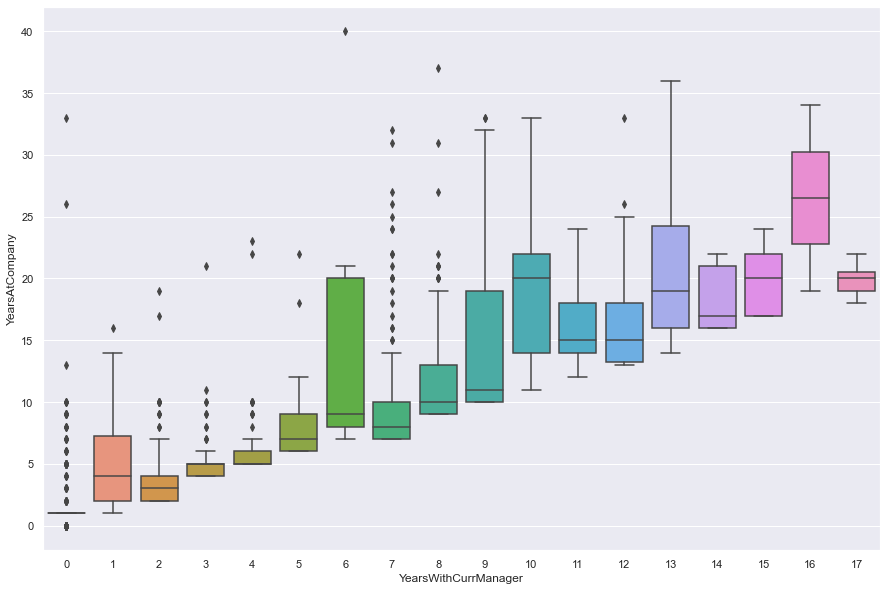

In [19]:
# Does years with current manager influence the employee to stay longer?
plt.figure(figsize=(15,10))
sns.boxplot(x=data.YearsWithCurrManager,y=data.YearsAtCompany)

- Employees tend to stay longer in the company if they stay more years under the same manager

In [20]:
# to check for categorical type columns and each unique values
for col in data.select_dtypes(['object']).columns:
    print(col, ':', sorted(data[col].unique()))

Attrition : ['No', 'Yes']
BusinessTravel : ['Non-Travel', 'Travel_Frequently', 'Travel_Rarely']
Department : ['Human Resources', 'Research & Development', 'Sales']
EducationField : ['Human Resources', 'Life Sciences', 'Marketing', 'Medical', 'Other', 'Technical Degree']
Gender : ['Female', 'Male']
JobRole : ['Healthcare Representative', 'Human Resources', 'Laboratory Technician', 'Manager', 'Manufacturing Director', 'Research Director', 'Research Scientist', 'Sales Executive', 'Sales Representative']
MaritalStatus : ['Divorced', 'Married', 'Single']
OverTime : ['No', 'Yes']


In [21]:
data['Attrition'] = data['Attrition'].map({'Yes':1,'No':0})

In [22]:
data.head(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Yes,11,3,1,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,No,23,4,4,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Yes,15,3,2,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Yes,11,3,3,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,No,12,3,4,1,6,3,3,2,2,2,2


In [23]:
# encode all categorical columns
Obj_col = data.select_dtypes(include='object')
Obj_col

,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,OverTime
0,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,Yes
1,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,No
2,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Yes
3,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married,Yes
4,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married,No
...,...,...,...,...,...,...,...
1465,Travel_Frequently,Research & Development,Medical,Male,Laboratory Technician,Married,No
1466,Travel_Rarely,Research & Development,Medical,Male,Healthcare Representative,Married,No
1467,Travel_Rarely,Research & Development,Life Sciences,Male,Manufacturing Director,Married,Yes
1468,Travel_Frequently,Sales,Medical,Male,Sales Executive,Married,No


In [24]:
data_with_dummies = pd.get_dummies(data, columns=Obj_col.columns,drop_first=True)

In [25]:
data_with_dummies.head()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Male,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
0,41,1,1102,1,2,2,94,3,2,4,5993,19479,8,11,3,1,0,8,0,1,6,4,0,5,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1
1,49,0,279,8,1,3,61,2,2,2,5130,24907,1,23,4,4,1,10,3,3,10,7,1,7,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0
2,37,1,1373,2,2,4,92,2,1,3,2090,2396,6,15,3,2,0,7,3,3,0,0,0,0,0,1,1,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,1,1
3,33,0,1392,3,4,4,56,3,1,3,2909,23159,1,11,3,3,0,8,3,3,8,7,3,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1
4,27,0,591,2,1,1,40,3,1,2,3468,16632,9,12,3,4,1,6,3,3,2,2,2,2,0,1,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0


<a id=section5></a>
## 5.  Data Preparation for Model Training

<a id=section501></a>
### 5.1 Preparing X and y using pandas

In [26]:
data_with_dummies.columns

Index(['Age', 'Attrition', 'DailyRate', 'DistanceFromHome', 'Education',
       'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel',
       'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'BusinessTravel_Travel_Frequently', 'BusinessTravel_Travel_Rarely',
       'Department_Research & Development', 'Department_Sales',
       'EducationField_Life Sciences', 'EducationField_Marketing',
       'EducationField_Medical', 'EducationField_Other',
       'EducationField_Technical Degree', 'Gender_Male',
       'JobRole_Human Resources', 'JobRole_Laboratory Technician',
       'JobRole_Manager', 'JobRole_Manufacturing Director',
       'JobRole_Research Director', 'JobRole_Res

In [27]:
X = data_with_dummies.loc[:,data_with_dummies.columns!="Attrition"]
y = data_with_dummies["Attrition"]

<a id=section502></a>
### 5.2 Splitting X and y into training and test datasets

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

In [29]:
print('Train cases as below')
print('X_train shape: ',X_train.shape)
print('y_train shape: ',y_train.shape)
print('\nTest cases as below')
print('X_test shape: ',X_test.shape)
print('y_test shape: ',y_test.shape)

Train cases as below
X_train shape:  (1102, 44)
y_train shape:  (1102,)

Test cases as below
X_test shape:  (368, 44)
y_test shape:  (368,)


<a id=section6></a>
## 6. Logistic Regression

In [30]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

<a id=section601></a>
### 6.1 Using model for prediction

In [31]:
y_pred_train_lr = logreg.predict(X_train)  

In [32]:
y_pred_test_lr = logreg.predict(X_test)   

In [33]:
probabilities_lr = logreg.predict_proba(X_test)

In [34]:
probabilities_1 = probabilities_lr[:,1]
probabilities_0 = probabilities_lr[:,0]

<a id=section602></a>
### 6.2 Model Evaluation for LR using accuracy classification score

In [35]:
# We will use accuracy score __ and __confusion matrix for evaluation.

from sklearn.metrics import accuracy_score
accuracy_train_lr = accuracy_score(y_train,y_pred_train_lr)
accuracy_test_lr = accuracy_score(y_test,y_pred_test_lr)
print('Accuracy score for train data is:', accuracy_train_lr)
print('Accuracy score for test data is:', accuracy_test_lr)

Accuracy score for train data is: 0.8784029038112523
Accuracy score for test data is: 0.8396739130434783


In [36]:
from sklearn.metrics import confusion_matrix
c_matrix_train_lr = pd.DataFrame(confusion_matrix(y_train, y_pred_train_lr))
c_matrix_train_lr.index = ['Retention','Attrition']
c_matrix_train_lr.columns = ['Predicted Retention','Predicted Attrition']
print("Confusion Matrix for LR for Train set\n",c_matrix_train_lr)

Confusion Matrix for LR for Train set
            Predicted Retention  Predicted Attrition
Retention                  928                    5
Attrition                  129                   40


In [68]:
c_matrix_test_lr = pd.DataFrame(confusion_matrix(y_test, y_pred_test_lr))
c_matrix_test_lr.index = ['Retention','Attrition']
c_matrix_test_lr.columns = ['Predicted Retention','Predicted Attrition']
print("Confusion Matrix for LR for test set\n",c_matrix_test_lr)

Confusion Matrix for LR for test set
            Predicted Retention  Predicted Attrition
Retention                  297                    3
Attrition                   56                   12


This means _968 (928 + 40)_ correct predictions and _134 (5 + 129)_ false predictions

<a id=section7></a>
## 7.  Decision Tree

In [38]:
from sklearn import tree
model_dt = tree.DecisionTreeClassifier(random_state = 0)
model_dt.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

In [39]:
y_pred_train_dt = model_dt.predict(X_train) 
y_pred_test_dt = model_dt.predict(X_test)

<a id=section701></a>
### 7.1 Model evaluation for Decision Tree

In [40]:
#from sklearn.metrics import accuracy_score
accuracy_train_dt = accuracy_score(y_train,y_pred_train_dt)
accuracy_test_dt = accuracy_score(y_test,y_pred_test_dt)
print('Accuracy score for train data for DT is:', accuracy_train_dt)
print('Accuracy score for test data for DT is:', accuracy_test_dt)

Accuracy score for train data for DT is: 1.0
Accuracy score for test data for DT is: 0.7744565217391305


In [41]:
# Model Evaluation using confusion matrix

c_matrix_train_dt = pd.DataFrame(confusion_matrix(y_train, y_pred_train_dt))
c_matrix_train_dt.index = ['Retention','Attrition']
c_matrix_train_dt.columns = ['Predicted Retention','Predicted Attrition']
print("Confusion Matrix for DT for Train set\n",c_matrix_train_dt)

Confusion Matrix for DT for Train set
            Predicted Retention  Predicted Attrition
Retention                  933                    0
Attrition                    0                  169


In [42]:
c_matrix_test_dt = pd.DataFrame(confusion_matrix(y_test, y_pred_test_dt))
c_matrix_test_dt.index = ['Retention','Attrition']
c_matrix_test_dt.columns = ['Predicted Retention','Predicted Attrition']
print("Confusion Matrix for DT for test set\n",c_matrix_test_dt)

Confusion Matrix for DT for test set
            Predicted Retention  Predicted Attrition
Retention                  259                   41
Attrition                   42                   26


<a id=section702></a>
### 7.2 Hyperparameter Optimization with Gridsearch

In [43]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

decision_tree_classifier = DecisionTreeClassifier(random_state = 0)


tree_para = [{'criterion':['gini','entropy'],'max_depth': range(2,60),
                             'max_features': ['sqrt', 'log2', None] }]
                            
model_dt_tuned = GridSearchCV(decision_tree_classifier,tree_para)

In [44]:
model_dt_tuned.get_params

<bound method BaseEstimator.get_params of GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=0,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid=[{'criterion': ['gini', 'entropy'],
                          'max_d

In [45]:
model_dt_tuned.fit(X_train, y_train)

GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=0,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid=[{'criterion': ['gini', 'entropy'],
                          'max_depth': range(2, 60),
                     

In [46]:
# Best parameters used.
model_dt_tuned.best_params_

{'criterion': 'gini', 'max_depth': 4, 'max_features': 'sqrt'}

In [47]:
y_pred_test_dt_tuned = model_dt_tuned.predict(X_test)
y_pred_train_dt_tuned = model_dt_tuned.predict(X_train)

In [48]:
from sklearn.metrics import accuracy_score
accuracy_train_dt_tuned = accuracy_score(y_train,y_pred_train_dt_tuned)
accuracy_test_dt_tuned = accuracy_score(y_test,y_pred_test_dt_tuned)
print('Accuracy score for train data is:', accuracy_train_dt_tuned)
print('Accuracy score for test data is:', accuracy_test_dt_tuned)

Accuracy score for train data is: 0.8611615245009074
Accuracy score for test data is: 0.8152173913043478


In [49]:
#from sklearn.metrics import confusion_matrix

c_matrix_train_dt_tuned = pd.DataFrame(confusion_matrix(y_train, y_pred_train_dt_tuned))

c_matrix_train_dt_tuned.index = ['Retention','Attrition']
c_matrix_train_dt_tuned.columns = ['Predicted Retention','Predicted Attrition']
print(c_matrix_train_dt_tuned)

           Predicted Retention  Predicted Attrition
Retention                  914                   19
Attrition                  134                   35


In [50]:
from sklearn.metrics import confusion_matrix

c_matrix_test_dt_tuned = pd.DataFrame(confusion_matrix(y_test, y_pred_test_dt_tuned))

c_matrix_test_dt_tuned.index = ['Retention','Attrition']
c_matrix_test_dt_tuned.columns = ['Predicted Retention','Predicted Attrition']
print(c_matrix_test_dt_tuned)

           Predicted Retention  Predicted Attrition
Retention                  288                   12
Attrition                   56                   12


<a id=section8></a>
## 8. Random Forest

In [51]:
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier(random_state = 0)

model_rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

<a id=section801></a>
### 8.1 Using the Model for Prediction

In [52]:
y_pred_train_rf = model_rf.predict(X_train) 
y_pred_test_rf = model_rf.predict(X_test) 

<a id=section802></a>
### 8.2 Model evaluation for Decision Tree

#### Model Evaluation using accuracy_score

In [53]:
#from sklearn.metrics import accuracy_score
accuracy_train_rf = accuracy_score(y_train,y_pred_train_rf)
accuracy_test_rf = accuracy_score(y_test,y_pred_test_rf)
print('Accuracy score for train data for DT is:', accuracy_train_rf)
print('Accuracy score for test data for DT is:', accuracy_test_rf)

Accuracy score for train data for DT is: 0.985480943738657
Accuracy score for test data for DT is: 0.8315217391304348


In [54]:
#Model Evaluation using confusion matrix
c_matrix_train_rf = pd.DataFrame(confusion_matrix(y_train, y_pred_train_rf))
c_matrix_train_rf.index = ['Retention','Attrition']
c_matrix_train_rf.columns = ['Predicted Retention','Predicted Attrition']
print("Confusion Mateix for DT for Train set\n",c_matrix_train_rf)

Confusion Mateix for DT for Train set
            Predicted Retention  Predicted Attrition
Retention                  933                    0
Attrition                   16                  153


In [55]:
c_matrix_test_rf = pd.DataFrame(confusion_matrix(y_test, y_pred_test_rf))
c_matrix_test_rf.index = ['Retention','Attrition']
c_matrix_test_rf.columns = ['Predicted Retention','Predicted Attrition']
print("Confusion Mateix for DT for test set\n",c_matrix_test_rf)

Confusion Mateix for DT for test set
            Predicted Retention  Predicted Attrition
Retention                  295                    5
Attrition                   57                   11


<a id=section803></a>
### 8.3 Hyper parameter for RF tuning using RANDOM SEARCH

In [56]:
from sklearn.model_selection import RandomizedSearchCV
# parameters for RandomSearchCV
param_dist = {"max_depth": range(2,6),
              "min_samples_split": range(6, 11),
              "min_samples_leaf": range(1, 5),
              "bootstrap": [True,False],
              "n_estimators": [100, 400],
              "criterion" : ["gini", "entropy"],
              'max_features': ['sqrt', 'log2',5]
             }
# run randomized search
n_iter_search = 100
model_rf_tuned = RandomizedSearchCV(model_rf, param_distributions = param_dist,
                                   n_iter = n_iter_search,
                                   n_jobs = -1)

In [57]:
model_rf_tuned.fit(X_train, y_train)

RandomizedSearchCV(cv='warn', error_score='raise-deprecating',
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    n_estimators=10,
                                                    n_jobs=Non

In [58]:
model_rf_tuned.best_params_

{'n_estimators': 100,
 'min_samples_split': 7,
 'min_samples_leaf': 4,
 'max_features': 5,
 'max_depth': 5,
 'criterion': 'gini',
 'bootstrap': False}

- Using the model for __prediction__

In [59]:
y_pred_test_rf_tuned = model_rf_tuned.predict(X_test)
y_pred_train_rf_tuned = model_rf_tuned.predict(X_train)

- __Model Evaluation__ using __accuracy_score__

In [60]:
from sklearn.metrics import accuracy_score
accuracy_train_rf_tuned = accuracy_score(y_train,y_pred_train_rf_tuned)
accuracy_test_rf_tuned = accuracy_score(y_test,y_pred_test_rf_tuned)
print('Accuracy score for train data is:', accuracy_train_rf_tuned)
print('Accuracy score for test data is:', accuracy_test_rf_tuned)

Accuracy score for train data is: 0.8720508166969148
Accuracy score for test data is: 0.8260869565217391


- __Model Evaluation__ using __confusion matrix__

In [61]:
#from sklearn.metrics import confusion_matrix

c_matrix_train_rf_tuned = pd.DataFrame(confusion_matrix(y_train, y_pred_train_rf_tuned))

c_matrix_train_rf_tuned.index = ['Retention','Attrition']
c_matrix_train_rf_tuned.columns = ['Predicted Retention','Predicted Attrition']
print(c_matrix_train_rf_tuned)

           Predicted Retention  Predicted Attrition
Retention                  933                    0
Attrition                  141                   28


In [62]:
from sklearn.metrics import confusion_matrix

c_matrix_test_rf_tuned = pd.DataFrame(confusion_matrix(y_test, y_pred_test_rf_tuned))

c_matrix_test_rf_tuned.index = ['Retention','Attrition']
c_matrix_test_rf_tuned.columns = ['Predicted Retention','Predicted Attrition']
print(c_matrix_test_rf_tuned)

           Predicted Retention  Predicted Attrition
Retention                  298                    2
Attrition                   62                    6


<a id=section6></a>
## 9.  Model Evaluation -  Comparing Models

### DT Vs LR Vs RF

<a id=section901></a>
### 9.1 Model evaluation using accuracy score

In [63]:
# All Accuracy scores
print("LOGISTIC REGRESSION")
print("Accuracy of LR on Train:", accuracy_train_lr)
print("Accuracy of LR on Test:", accuracy_test_lr)

print("\nDT WITH Hyperparameter tuning:")
print("Accuracy of DT on Train:", accuracy_train_dt_tuned)
print("Accuracy of DT on Test:", accuracy_test_dt_tuned)

print("\nRANDOM FOREST With Tuning")
print("Accuracy of RF on Train:", accuracy_train_rf_tuned)
print("Accuracy of RF on Test:", accuracy_test_rf_tuned)

LOGISTIC REGRESSION
Accuracy of LR on Train: 0.8784029038112523
Accuracy of LR on Test: 0.8396739130434783

DT WITH Hyperparameter tuning:
Accuracy of DT on Train: 0.8611615245009074
Accuracy of DT on Test: 0.8152173913043478

RANDOM FOREST With Tuning
Accuracy of RF on Train: 0.8720508166969148
Accuracy of RF on Test: 0.8260869565217391


As per Accuracy score, LR model looks to be better

<a id=section902></a>
### 9.2 Model evaluation using confusion matrix

In [69]:
# All Confusion Matrix
print("Confusion Matrix for LR on Train Set:\n", c_matrix_train_lr,"\n")
print("Confusion Matrix for LR on Test Set:\n", c_matrix_test_lr,"\n\n\n")

print("Confusion Matrix for DT TUNED on Train Set:\n", c_matrix_train_dt_tuned)
print("Confusion Matrix for DT TUNED on Test Set:\n", c_matrix_test_dt_tuned,"\n\n\n")

print("Confusion Matrix for RF TUNED on Train Set:\n", c_matrix_train_rf_tuned)
print("Confusion Matrix for RF TUNED on Test Set:\n", c_matrix_test_rf_tuned)

Confusion Matrix for LR on Train Set:
            Predicted Retention  Predicted Attrition
Retention                  928                    5
Attrition                  129                   40 

Confusion Matrix for LR on Test Set:
            Predicted Retention  Predicted Attrition
Retention                  297                    3
Attrition                   56                   12 



Confusion Matrix for DT TUNED on Train Set:
            Predicted Retention  Predicted Attrition
Retention                  914                   19
Attrition                  134                   35
Confusion Matrix for DT TUNED on Test Set:
            Predicted Retention  Predicted Attrition
Retention                  288                   12
Attrition                   56                   12 



Confusion Matrix for RF TUNED on Train Set:
            Predicted Retention  Predicted Attrition
Retention                  933                    0
Attrition                  141                   28

<a id=section903></a>
### 9.3 Model evaluation using precision score

In [65]:
from sklearn.metrics import precision_score
precision_train_lr = precision_score(y_train,y_pred_train_lr)
precision_test_lr = precision_score(y_test,y_pred_test_lr)

precision_train_dt_tuned = precision_score(y_train,y_pred_train_dt_tuned)
precision_test_dt_tuned = precision_score(y_test,y_pred_test_dt_tuned)

precision_train_rf_tuned = precision_score(y_train,y_pred_train_rf_tuned)
precision_test_rf_tuned = precision_score(y_test,y_pred_test_rf_tuned)


print("LOGISTIC REGRESSION")
print('Precision score for train data using LR model:', precision_train_lr)
print('Precision score for test data using LR model:', precision_test_lr)

print("\nDT WITH Hyperparameter tuning:")
print('Precision score for train data using DT model:', precision_train_dt_tuned)
print('Precision score for test data using DT model:', precision_test_dt_tuned)

print("\nRANDOM FOREST With Tuning:")
print('Precision score for train data using RF model:', precision_train_rf_tuned)
print('Precision score for test data using RF model:', precision_test_rf_tuned)

LOGISTIC REGRESSION
Precision score for train data using LR model: 0.8888888888888888
Precision score for test data using LR model: 0.8

DT WITH Hyperparameter tuning:
Precision score for train data using DT model: 0.6481481481481481
Precision score for test data using DT model: 0.5

RANDOM FOREST With Tuning:
Precision score for train data using RF model: 1.0
Precision score for test data using RF model: 0.75


As per precision score, LR model looks to be better

<a id=section904></a>
### 9.4 Model evaluation using recall score

In [66]:
# Recall
from sklearn.metrics import recall_score

recall_train_lr = recall_score(y_train,y_pred_train_lr)
recall_test_lr = recall_score(y_test,y_pred_test_lr)

recall_train_dt_tuned = recall_score(y_train,y_pred_train_dt_tuned)
recall_test_dt_tuned = recall_score(y_test,y_pred_test_dt_tuned)

recall_train_rf_tuned = recall_score(y_train,y_pred_train_rf_tuned)
recall_test_rf_tuned = recall_score(y_test,y_pred_test_rf_tuned)

print("LOGISTIC REGRESSION")
print('Recall score for train data using LR model:', recall_train_lr)
print('Recall score for test data using LR model:', recall_test_lr)

print("\nDT WITH Hyperparameter tuning:")
print('Recall score for train data using DT model:', recall_train_dt_tuned)
print('Recall score for test data using DT model:', recall_test_dt_tuned)

print("\nRANDOM FOREST With Tuning:")
print('Recall score for train data using RF model:', recall_train_rf_tuned)
print('Recall score for test data using RF model:', recall_test_rf_tuned)

LOGISTIC REGRESSION
Recall score for train data using LR model: 0.23668639053254437
Recall score for test data using LR model: 0.17647058823529413

DT WITH Hyperparameter tuning:
Recall score for train data using DT model: 0.20710059171597633
Recall score for test data using DT model: 0.17647058823529413

RANDOM FOREST With Tuning:
Recall score for train data using RF model: 0.16568047337278108
Recall score for test data using RF model: 0.08823529411764706


As per Recall score, LR model looks to be better

<a id=section905></a>
### 9.5 Summary

Logistic Regression model looks to be good fit for this attrition data